In [1]:
library(dplyr)
library(cluster)
library(caret)

d = longley %>%
  dplyr::select(GNP.deflator, Armed.Forces,Population, Employed)

str(d)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2


'data.frame':	16 obs. of  4 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...


In [2]:
## Normalizing the data
# This is gaussian method: we should only use trainset to create scaleObj
scaleObj = preProcess(d, method = c("center","scale"))

## Apply scaleObj to dataset(train set)
dNorm = predict(scaleObj, d)
dNorm

,GNP.deflator,Armed.Forces,Population,Employed
,<dbl>,<dbl>,<dbl>,<dbl>
1947,-1.73109925,-1.46092666,-1.411135233,-1.42199459
1948,-1.22144139,-1.65347763,-1.263926342,-1.19448684
1949,-1.24924091,-1.42356602,-1.099897684,-1.46527516
1950,-1.12877633,-1.37470980,-0.933712647,-1.17597871
1951,-0.50792039,0.70742726,-0.768965196,-0.59681631
1952,-0.33185676,1.41871632,-0.597173570,-0.47779474
1953,-0.24845821,1.35117978,-0.334957732,-0.09339492
1954,-0.15579314,1.06810111,-0.173229213,-0.44305638
1955,-0.04459506,0.63414293,-0.005175313,0.19988791


In [4]:
## dissimilarity matrix
## compute all the pairwise dissilmilarities (distances) between observations in the data set.
myDist = daisy(dNorm, metric = "euclidean")
myDist


Dissimilarities :
          1947      1948      1949      1950      1951      1952      1953
1948 0.6084877                                                            
1949 0.5764766 0.3922549                                                  
1950 0.8115925 0.4423595 0.3580622                                        
1951 2.7002272 2.5855716 2.4401692 2.2546236                              
1952 3.4357343 3.3448383 3.1855944 3.0064979 0.7619770                    
1953 3.6096402 3.4713180 3.3418511 3.1202450 0.9610065 0.4775321          
1954 3.3716913 3.2088729 3.0508489 2.8336428 0.7953758 0.5786752 0.4869698
1955 3.4410520 3.1854215 3.1074946 2.8224331 1.1992304 1.2279212 0.8662986
1956 3.8054172 3.4735180 3.4552302 3.1356036 1.8400445 1.8825067 1.4808986
1957 4.1169998 3.7455834 3.7321128 3.4076900 2.2131336 2.2241812 1.8244810
1958 4.0320261 3.6293266 3.5865972 3.2737292 2.2726760 2.3458016 2.0162436
1959 4.4938475 4.0687755 4.0713111 3.7390367 2.8206577 2.8624697 2.4771375
1960 4.

In [5]:
nrow(myDist)
nrow(as.matrix(myDist))

NULL

[1] 16

In [12]:
## Clustering with agnes
agnesClust = agnes(myDist, diss=T, method="complete")
agnesClust

Warning message in if ((diss <- as.logical(diss))) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (!diss) {:
“the condition has length > 1 and only the first element will be used”

Call:	 agnes(x = myDist, diss = T, method = "complete") 
Agglomerative coefficient:  0.8952904 
Order of objects:
 [1] 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
[16] 1962
Height (summary):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3581  0.4621  0.8116  1.3848  1.3896  5.6521 

Available components:
[1] "order"     "height"    "ac"        "merge"     "diss"      "call"     
[7] "method"    "order.lab"

In [13]:
#3 ac = accuracy
agnesClust$ac

[1] 0.8952904

^^^^^ values closer to 1 suggest strong clustering structure

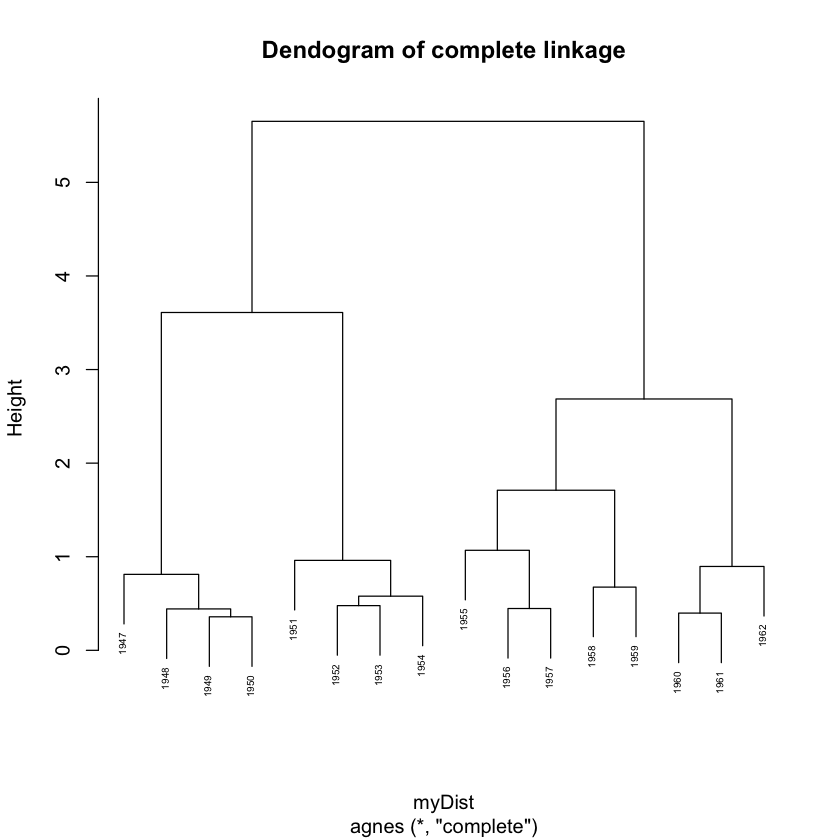

In [14]:
pltree(agnesClust, main="Dendogram of complete linkage", cex=0.5)

In [15]:
## Comparing Different Linkage Methods
m <- c("average","single","complete","ward")

myAc = sapply(m, function(myMethod){
  agnes(myDist, method = myMethod)$ac
})

myAc

average    single  complete      ward 
0.8480666 0.7806937 0.8952904 0.9290746

Based on the above values Ward’s method provides us with the
strongest clustering structure of the four methods.

We can use “
cutree ” to see how many
elements are in each of the clusters.

In [18]:
cutree(agnesClust,3)

[1] 1 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3

In [19]:
table(cutree(agnesClust,3))


1 2 3 
4 4 8 

In [20]:
sapply(2:5, function(i){
    table(cutree(agnesClust,i))
})

[[1]]

1 2 
8 8 

[[2]]

1 2 3 
4 4 8 

[[3]]

1 2 3 4 
4 4 5 3 

[[4]]

1 2 3 4 5 
4 4 3 2 3 


## Elbow Plot

In [24]:
install.packages("fpc")

Installing package into ‘/Users/natnicha/Library/R/3.6/library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘modeltools’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘kernlab’




The downloaded binary packages are in
	/var/folders/t7/cn820ky97nj92q0rzxdf75cr0000gn/T//RtmpFh9RNw/downloaded_packages


### WSS

The total within cluster sum of square(wss) measures the compactness of the clustering and therefore we want it to be as small as possible


In [26]:

library(fpc)

cluster.stats(d = myDist, clustering = cutree(agnesClust, k=3))["within.cluster.ss"]

$within.cluster.ss
[1] 7.67187

In [56]:
wss = sapply(2:6, function(i) {
    unlist(cluster.stats(d = myDist, clustering = cutree(agnesClust, k=i))["within.cluster.ss"])
})

In [57]:
(wssDF = data.frame(k = c(2:6), within.cluster.ss = wss))

k,within.cluster.ss
<int>,<dbl>
2,26.097297
3,7.671870
4,3.571774
5,2.474945
6,1.965529


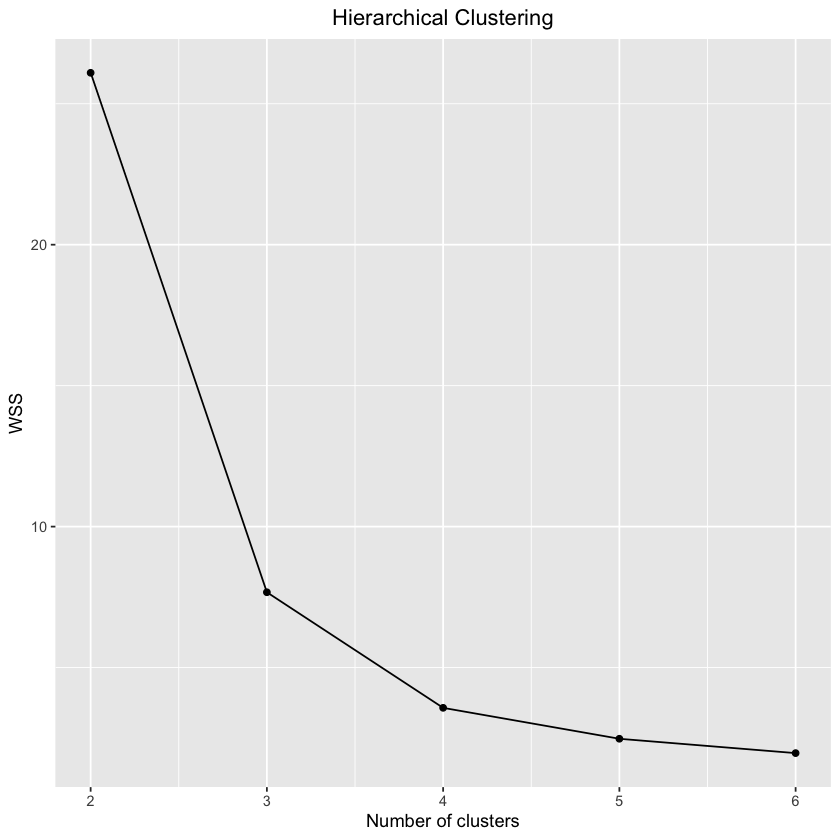

In [40]:
library(ggplot2) 

wssDF %>%
    ggplot(aes(x=k, y=within.cluster.ss)) + 
        geom_point()+
        geom_line()+
        ggtitle("Hierarchical Clustering") +
        labs(x = "Number of clusters", y="WSS") +
        theme(plot.title = element_text(hjust = 0.5))

## Silhouette Score

Silhouette Score is a
measure that indicates how
well each observation fits
into the cluster that it's
been assigned to.

In [51]:
silhouette(cutree(agnesClust, k=3), myDist)

      cluster neighbor  sil_width
 [1,]       1        2  0.7970560
 [2,]       1        2  0.8474192
 [3,]       1        2  0.8528050
 [4,]       1        2  0.8083504
 [5,]       2        1  0.6635658
 [6,]       2        3  0.7686951
 [7,]       2        3  0.7124846
 [8,]       2        3  0.7123789
 [9,]       3        2 -0.3949492
[10,]       3        2  0.2708907
[11,]       3        2  0.5067488
[12,]       3        2  0.4930176
[13,]       3        2  0.6435917
[14,]       3        2  0.6497967
[15,]       3        2  0.6261928
[16,]       3        2  0.5547416
attr(,"Ordered")
[1] FALSE
attr(,"call")
silhouette.default(x = cutree(agnesClust, k = 3), dist = myDist)
attr(,"class")
[1] "silhouette"

In [54]:
silScore = sapply(2:6, function(i){
    mean(silhouette(cutree(agnesClust, k=i), myDist)[,'sil_width'])
})

In [58]:
(silScoreDF = data.frame(k=c(2:6), silScore))

k,silScore
<int>,<dbl>
2,0.4622284
3,0.5945491
4,0.5385505
5,0.4701848
6,0.4147656


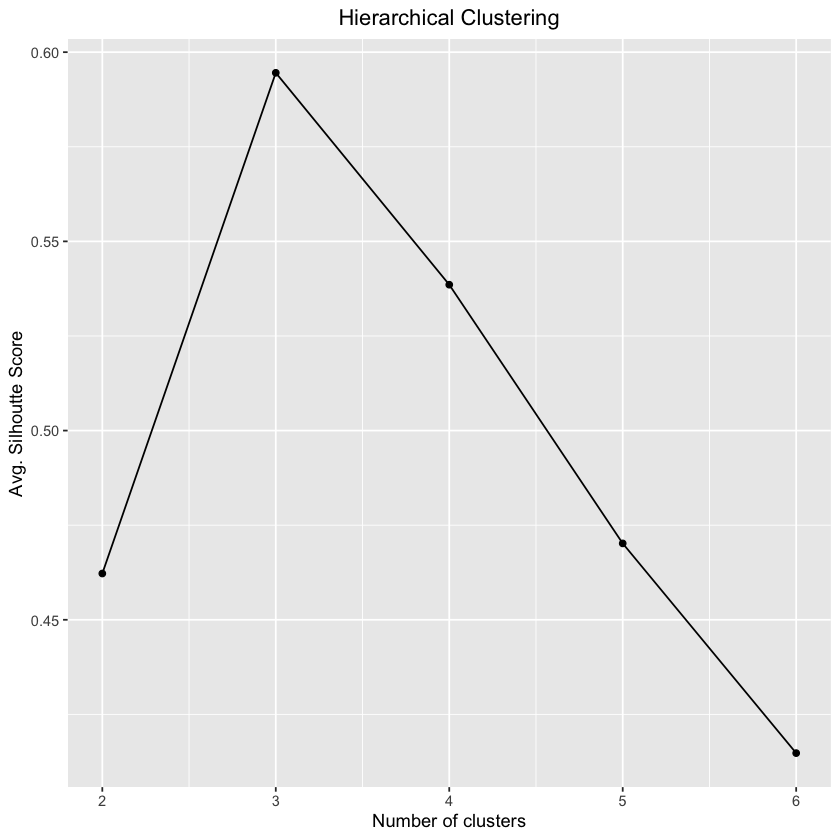

In [60]:
silScoreDF %>%
    ggplot(aes(x=k, y=silScore)) + 
        geom_point()+
        geom_line()+
        ggtitle("Hierarchical Clustering") +
        labs(x = "Number of clusters", y="Avg. Silhoutte Score") +
        theme(plot.title = element_text(hjust = 0.5))

# Diana Clustering

In [61]:
dianaClust = diana(myDist, diss=T)

Warning message in if ((diss <- as.logical(diss))) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (!diss) {:
“the condition has length > 1 and only the first element will be used”

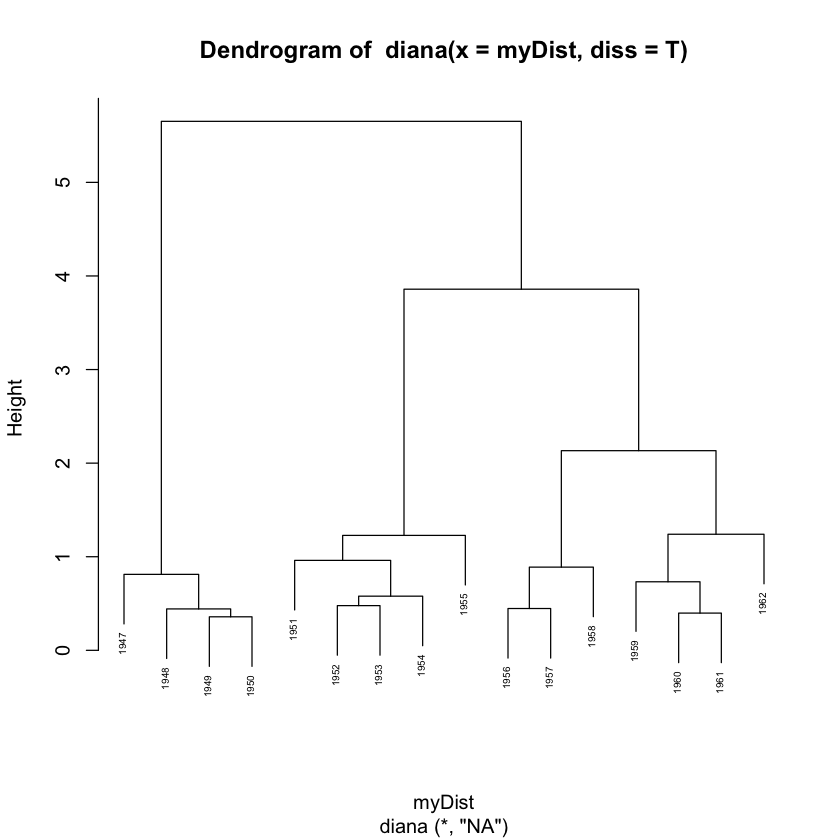

In [63]:
pltree(dianaClust, cex=0.5)